In [ ]:
import numpy as np
import pandas as pd


In [ ]:
dataset = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
(sampleNum,featureNum)=dataset.shape
print('Number of samples',sampleNum)
print('Number of features',featureNum-1)
classNum = ((dataset.iloc[:,-1].unique()))
print('Names of classes',classNum)

Number of samples 2200
Number of features 7
Names of classes ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
dataset.sample(10)

,N,P,K,temperature,humidity,ph,rainfall,label
158,66,44,20,19.078147,69.022986,6.740001,80.725159,maize
1935,115,48,16,25.543597,84.092298,7.175935,88.942455,cotton
740,24,80,19,29.678925,69.085455,6.808042,65.664366,blackgram
1856,10,24,27,27.572835,94.904857,5.708410,145.929893,coconut
1362,111,6,53,26.493065,88.591431,6.313513,46.063822,watermelon
234,31,79,75,18.820225,16.107479,8.204862,89.731194,chickpea
349,9,80,19,21.806196,18.570866,5.945466,125.097269,kidneybeans
685,32,56,21,27.385390,88.666640,6.702772,58.299331,mungbean
1024,114,79,51,26.210092,82.344295,6.313197,112.070003,banana
939,19,17,39,24.724856,85.560832,6.728599,111.278758,pomegranate


In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape,y.shape)

(2200, 7) (2200,)


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
le = LabelEncoder()
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):
        X[:, i] = le.fit_transform(X[:, i])

sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

(2200, 7) (2200,)
Confusion Matrix:
 [[ 0  0  0  4 11  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  5  5  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2 11  7  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  9  2  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  8  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  5  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  2 10  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  5  7  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  2  9  9  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  9  7  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  7  5  4  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4 10  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  2 10  7  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  2  8  7  2  1  0  0  0  0  0  0  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


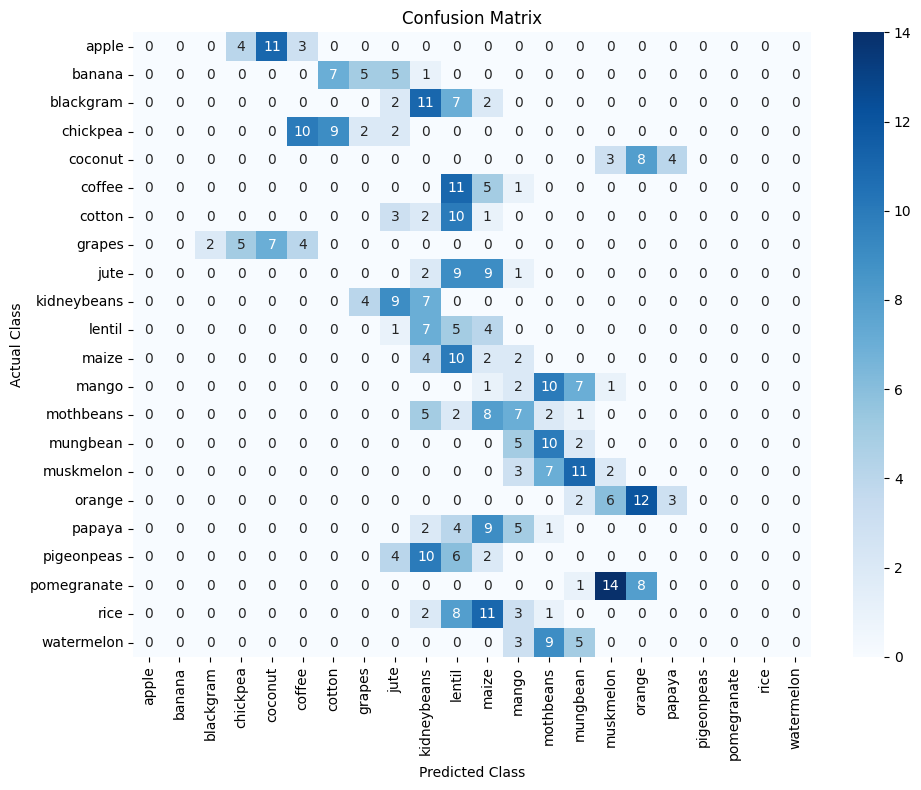

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(X.shape,y.shape)
le_X = LabelEncoder()
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):
        X[:, i] = le_X.fit_transform(X[:, i])
le_y = LabelEncoder()
y = le_y.fit_transform(y)
X = X.astype(np.float64)


sc = StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_continuous = model.predict(X_test)
y_pred = np.round(y_pred_continuous).astype(int)
unique_actual_labels = np.unique(y_test)
min_label = unique_actual_labels.min()
max_label = unique_actual_labels.max()
y_pred = np.clip(y_pred, min_label, max_label)

cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=le_y.classes_) # Use original class names for report
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy:", acc)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_y.classes_,
            yticklabels=le_y.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Model: Naive Bayes
Accuracy: 0.9955
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00  

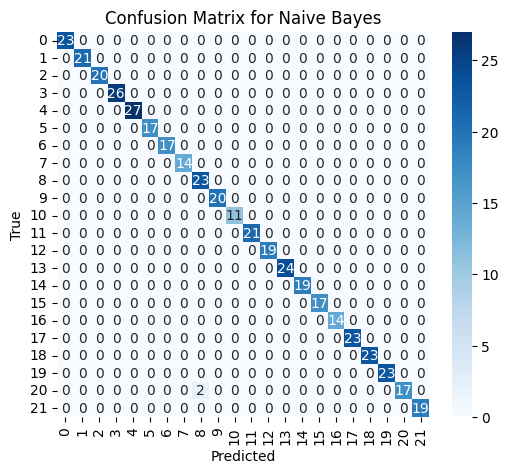

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

target_column = df.columns[-1]

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

X = df.drop(target_column, axis=1)

y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model: Naive Bayes")
print(f"Accuracy: {accuracy:.4f}")
print(report)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))

unique_classes = np.unique(np.concatenate((y_test, y_pred)))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

Model: SVM
Accuracy: 0.9795
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.87      0.87      0.87        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14

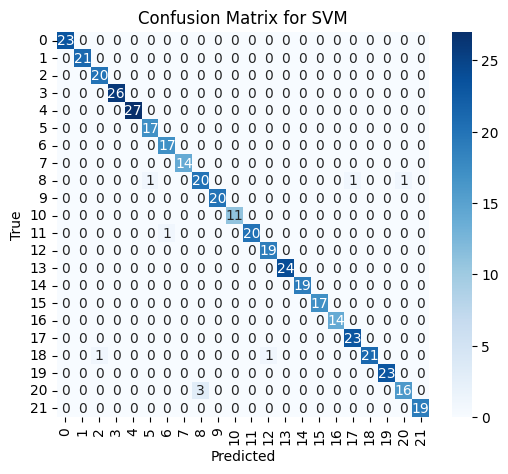

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


target_column = df.columns[-1]

X = df.drop(target_column, axis=1)

y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Model: SVM")
print(f"Accuracy: {accuracy:.4f}")
print(report)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6,5))

unique_classes = np.unique(np.concatenate((y_test, y_pred)))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for SVM")
plt.show()

Model: Random Forest
Accuracy: 0.9932
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0

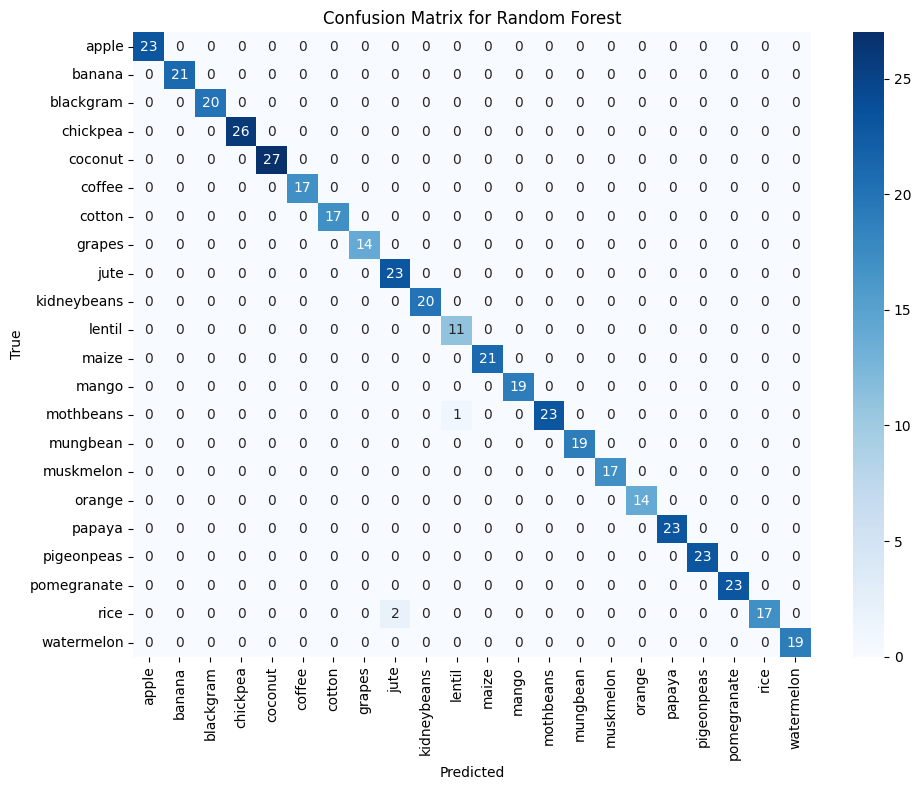

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


target_column = df.columns[-1]

X = df.drop(target_column, axis=1)

y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

target_column = df.columns[-1]

feature_cols = df.select_dtypes(include='object').columns.tolist()
if target_column in feature_cols:
    feature_cols.remove(target_column)

for col in feature_cols:
    le_feature = LabelEncoder()
    df[col] = le_feature.fit_transform(df[col])

le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

report = classification_report(y_test, y_pred, target_names=le_target.classes_)

print("Model: Random Forest")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Random Forest")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:54:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XG Boost
Accuracy: 0.9864
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0 23  0  0  

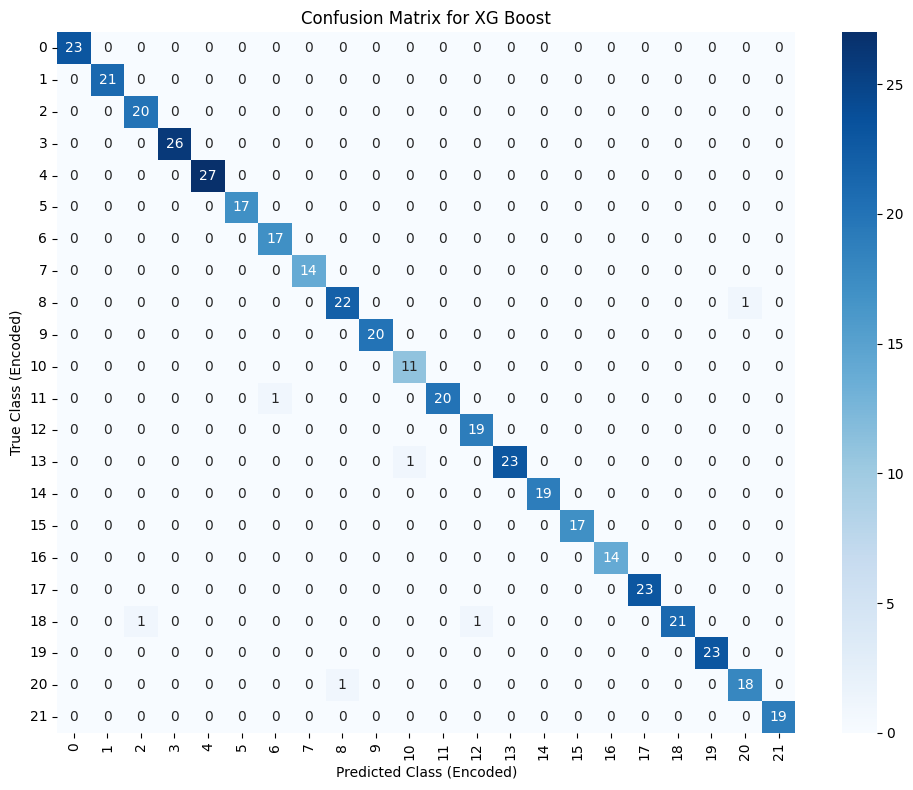

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)

y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

unique_classes = np.unique(np.concatenate((y_test, y_pred)))

report = classification_report(y_test, y_pred)

print("Model: XG Boost")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes,
            yticklabels=unique_classes)
plt.xlabel("Predicted Class (Encoded)")
plt.ylabel("True Class (Encoded)")
plt.title("Confusion Matrix for XG Boost")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Model: KNN
Accuracy: 0.9705
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0 

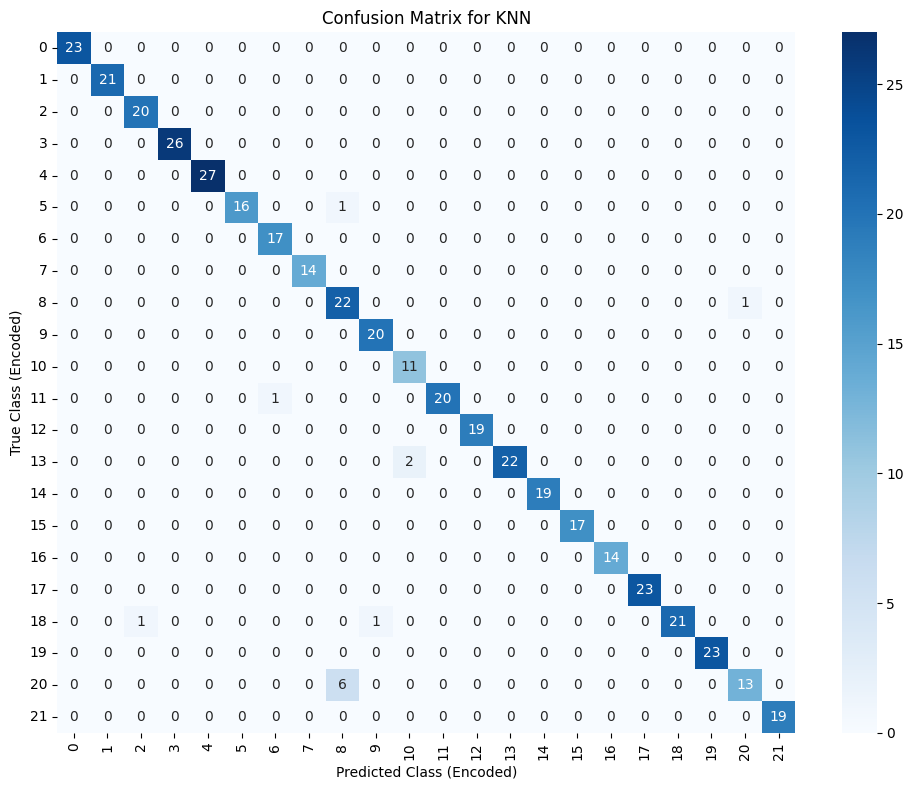

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

unique_classes = np.unique(np.concatenate((y_test, y_pred)))

report = classification_report(y_test, y_pred)

print("Model: KNN")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=unique_classes, yticklabels=unique_classes)
plt.xlabel("Predicted Class (Encoded)")
plt.ylabel("True Class (Encoded)")
plt.title("Confusion Matrix for KNN")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Model: Decision Tree
Accuracy: 0.9864
Confusion Matrix:
 [[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0

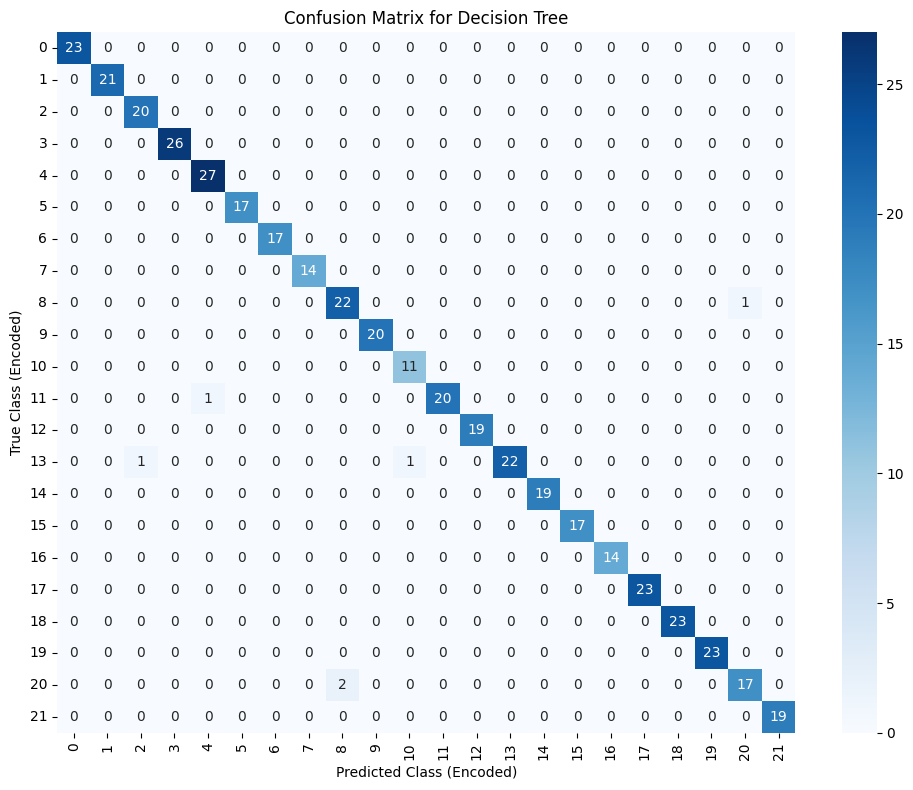

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Crop_recommendation.csv')
df.dropna(inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

target_column = df.columns[-1]

X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

unique_classes = np.unique(np.concatenate((y_test, y_pred)))
report = classification_report(y_test, y_pred)

print("Model: Decision Tree")
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_classes,
            yticklabels=unique_classes)
plt.xlabel("Predicted Class (Encoded)")
plt.ylabel("True Class (Encoded)")
plt.title("Confusion Matrix for Decision Tree")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-24-3753221925>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="plasma")


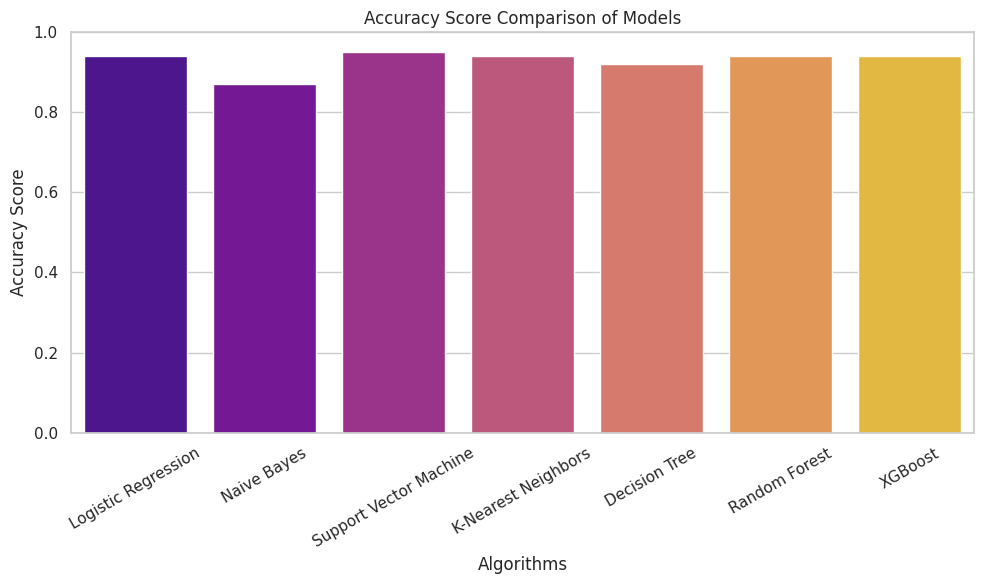

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
models = [
    'Logistic Regression',
    'Naive Bayes',
    'Support Vector Machine',
    'K-Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'XGBoost'
]
accuracy_scores = [
    0.94,
    0.87,
    0.95,
    0.94,
    0.92,
    0.94,
    0.94
]
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracy_scores, palette="plasma")
plt.title("Accuracy Score Comparison of Models")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=30)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


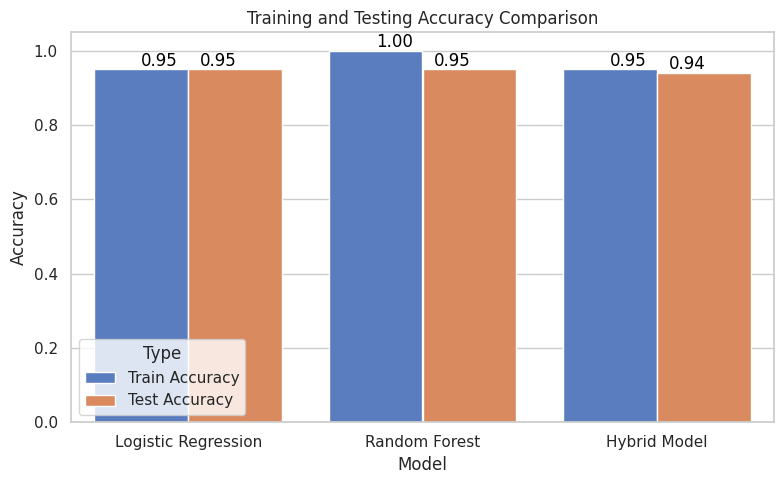

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
models = ['Logistic Regression', 'Random Forest', 'Hybrid Model']
train_accuracy = [0.95, 1.00, 0.95]
test_accuracy = [0.95, 0.95, 0.94]
data = pd.DataFrame({
    'Model': models * 2,
    'Accuracy': train_accuracy + test_accuracy,
    'Type': ['Train Accuracy'] * 3 + ['Test Accuracy'] * 3
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', hue='Type', data=data, palette='muted')
for i in range(len(models)):
    plt.text(i - 0.2, train_accuracy[i] + 0.01, f"{train_accuracy[i]:.2f}", color='black')
    plt.text(i + 0.05, test_accuracy[i] + 0.01, f"{test_accuracy[i]:.2f}", color='black')
plt.title('Training and Testing Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()
